/Users/josep/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


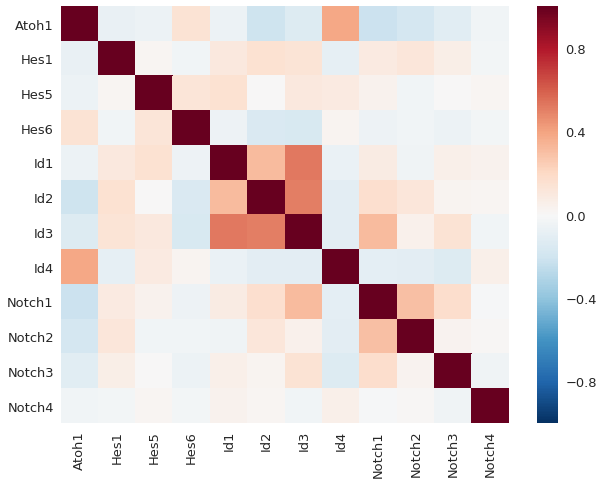

7.3382251262664795


In [157]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr 
import time
from mpl_toolkits.mplot3d import Axes3D


start = time.time()

%matplotlib inline
cmap = 'RdBu_r'
sns.set(context = 'notebook', style = 'dark', font='helvetica', font_scale=1.3, rc={'lines.linewidth': 1.3})


Xim = pd.read_csv('./Ensembl_IDs_mouse.txt', sep=',', index_col=None, header = 0)
Xih = pd.read_csv('./Ensembl_IDs_human.txt', sep='\t', index_col=None, header = 0)

def ensembl_to_geneID(Xi, g):
    return [[Xi[Xi['Symbol']==i]['Ensembl Gene ID'].values[0] for i in g[j]] for j in range(len(g))]

X1m = pd.read_csv('./mouse_expression1.csv', index_col=0, header=0)
X2m = pd.read_csv('./mouse_expression2.csv', index_col=0, header=0)

#D = np.transpose(pd.read_excel('./mmc3.xlsx', index_col=0, header=0))
Dh = pd.read_excel('./dades_transposat.xls', sheet_name = 'Sheet1', index_col=0, header=0)
Dm = np.transpose(pd.concat([X1m, X2m], axis=1, join='inner'))

#gp = ['Atoh1','Hes1','Hes5','Hes6','Id1','Id2','Id3','Id4','Notch1','Notch2','Notch3','Notch4']

gp1 = ['Atoh1','Notch1','Notch2','Notch3','Notch4']
gp2 = ['Hes1','Hes5','Hes6','Id1','Id2','Id3','Id4',]
g = (Dh.columns).values #all human gene

g = g[[i for i in range(1,len(g))]]

A = pd.concat([np.log2(Dh[gp]+1),Dh['Cell type']], axis = 1)

g_transformed = ensembl_to_geneID(Xim, [g])
gm = g_transformed[0]

gp_transformed = ensembl_to_geneID(Xim, [gp])
gmp = gp_transformed[0]

### HUMAN

fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(Dh[gp].corr(), cmap = cmap, vmin = -1, vmax = 1, center = 0)
plt.tight_layout()
plt.savefig("correlation_human.pdf", bbox_inches="tight")

### MOUSE

#fig, ax = plt.subplots(figsize=(9,7))
#sns.heatmap(Dm[gmp].corr(), cmap = cmap, vmin = -1, vmax = 1, center = 0, xticklabels = gp, yticklabels = gp)
#plt.tight_layout()
#plt.savefig("correlation_mouse.pdf", bbox_inches="tight")

#plt.figure()
#sns.clustermap(np.log2(Dm[gm]+1), figsize=(15, 7), cmap = cmap, metric = 'euclidean', method="ward")
#plt.tight_layout()
#plt.savefig("clustering_mouse.pdf", bbox_inches="tight")

#plt.figure()
#p = sns.pairplot(np.log2(Dm[gmp]+1), diag_kind=None, plot_kws = dict(s=40, color = 'b', alpha = 0.5))
#p.set(xlim=(-1, 15), ylim=(-1, 15))
#plt.savefig("genes_mouse.pdf", bbox_inches="tight")


plt.show()

end = time.time()

print(end - start)

/Users/josep/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/josep/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<Figure size 432x288 with 0 Axes>

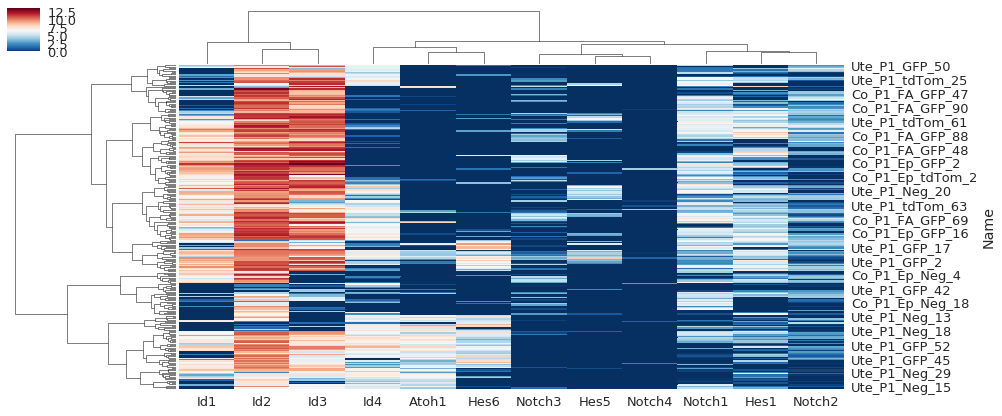

In [158]:
plt.figure()
sns.clustermap(np.log2(Dh[gp]+1), figsize=(15, 7), cmap = cmap, metric = 'euclidean', method="ward")
plt.tight_layout()
plt.savefig("clustering_human.pdf", bbox_inches="tight")


/Users/josep/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


<Figure size 432x288 with 0 Axes>

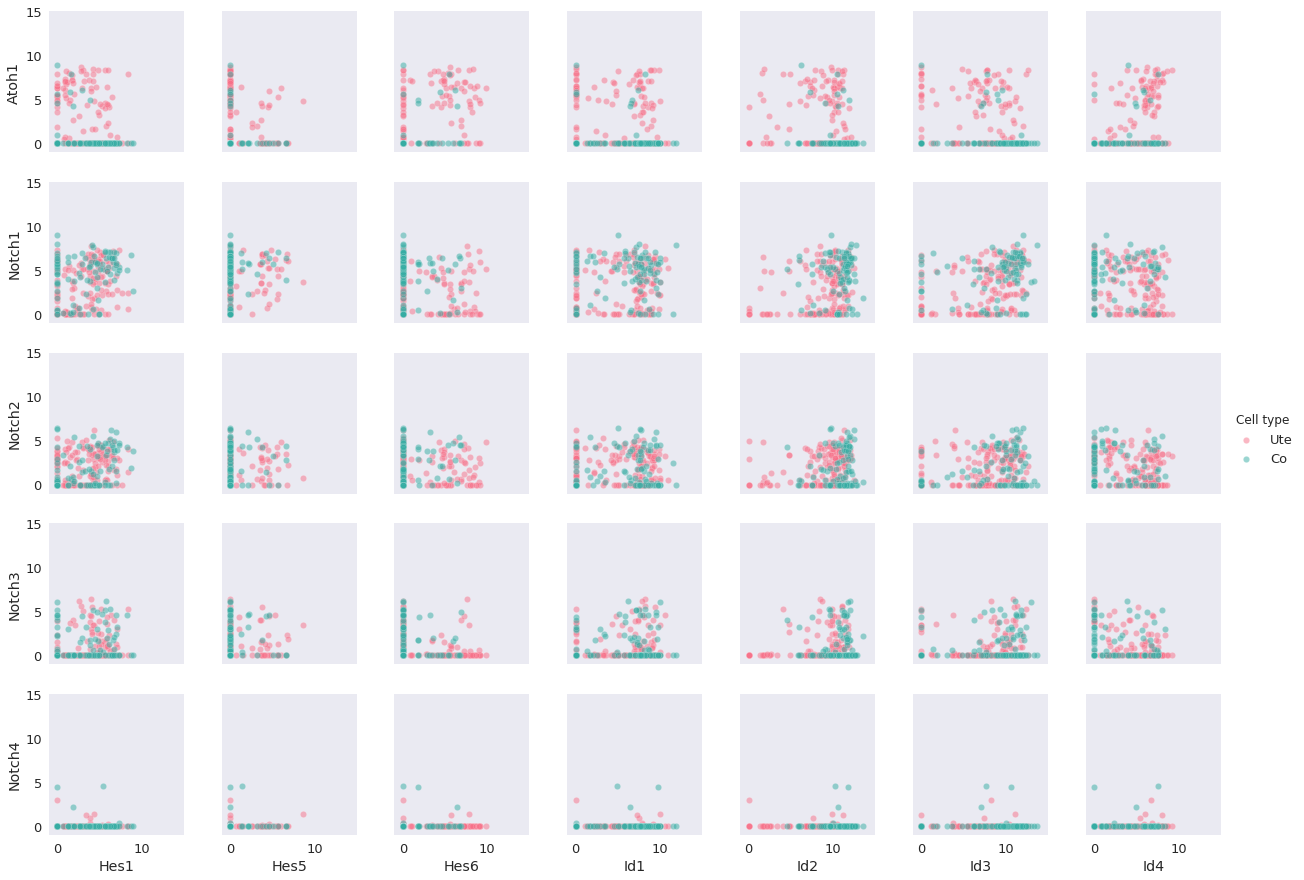

In [159]:
plt.figure()
p = sns.pairplot(A, hue = 'Cell type', palette = 'husl', plot_kws = dict(s=40, alpha = 0.5), x_vars = gp2, y_vars = gp1)
p.set(xlim=(-1, 15), ylim=(-1, 15))
plt.savefig("genes_human.pdf", bbox_inches="tight")